# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis with pandas. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [272]:
# Import the appropriate libraries with aliases
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create two new dataframes
north_df = pd.read_csv(r"NorthCallCenter.csv")
south_df = pd.read_csv(r"SouthCallCenter.csv")

pd.set_option('display.max_columns', 200) #changing view to see all columns

display(north_df.head(10))
display(south_df.head(10))

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
5,5,North,Product Support,2:00 PM,Incoming,B,Duke,NO,0,0,12,2,1.0,2,1
6,6,North,Product Support,2:00 PM,Incoming,A,Joe,NO,0,0,8,1,1.0,3,1
7,7,North,Product Support,2:00 PM,Incoming,B,Lilly,NO,0,0,11,2,1.0,3,1
8,8,North,Product Support,3:00 PM,Incoming,B,Duke,NO,0,0,12,2,1.0,4,1
9,9,North,Product Support,3:00 PM,Incoming,A,Cam,NO,0,0,11,3,1.0,4,1


,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1
5,5,South,Sales Support,1:00 PM,Incoming,D,Karl,NO,0,0,9,1,1.0,4,1
6,6,South,Product Support,11:00 AM,Incoming,C,Sandy,NO,0,0,8,1,1.0,2,1
7,7,South,Product Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,1,1.0,3,1
8,8,South,Product Support,2:00 PM,Incoming,D,Randy,NO,0,0,11,2,1.0,4,1
9,9,South,Product Support,3:00 PM,Incoming,D,George,NO,0,0,8,3,1.0,4,1


## Task 1: Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. Use the code blocks below to begin cleaning your data. At the end of the section, record your answers.

#### EDA Question 1A:  How many reps are in the North branch?  

In [273]:
# EDA Question 1A solution below:
north_branch_reps = north_df['Rep ID'].value_counts()
print(north_branch_reps)

nb_reps = len(pd.unique(north_df['Rep ID']))
print ()
print ("Number of Reps in North Branch :", 
        nb_reps)

Rep ID
Brent     37
Lilly     30
Todd      29
Duke      29
Joe       26
Cam       24
Xander    24
Amanda    23
Andy      23
Name: count, dtype: int64

Number of Reps in North Branch : 9


#### EDA Question 1B:  How many reps are in the South branch?  

In [274]:
# EDA Question 1B solution Below:
south_branch_reps = south_df['Rep ID'].value_counts()
print(south_branch_reps)

sb_reps = len(pd.unique(south_df['Rep ID']))
print()
print ("Number of Reps in South Branch :", 
        sb_reps)

Rep ID
Eric      35
Randy     33
Sandy     32
Helga     31
Kate      29
George    29
Karl      28
Susan     26
Josh      26
Sharon    25
Alice     20
Name: count, dtype: int64

Number of Reps in South Branch : 11


#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [275]:
# EDA Question 2A solution Below:
avg_busy_mins_NDF = north_df['Busy Minutes'].mean().round(2)
print("Average busy minutes for North Branch :",
        avg_busy_mins_NDF)

avg_ntrdy_mins_NDF = north_df['Not Ready Minutes'].mean().round(2)
print("Average not ready minutes for North Branch :",
        avg_ntrdy_mins_NDF)

incoming_wt_time_NDF = north_df['Incoming Wait Time'].mean().round(2)
print("Average incoming wait time for North Branch :",
        incoming_wt_time_NDF)

during_call_wt_time_NDF = north_df['During Call Wait Time'].mean().round(2)
print("Average during call wait time for North Branch :",
        during_call_wt_time_NDF)

Average busy minutes for North Branch : 9.99
Average not ready minutes for North Branch : 1.91
Average incoming wait time for North Branch : 3.05
Average during call wait time for North Branch : 2.97


#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [276]:
# EDA Question 2B solution Below:
avg_busy_mins_SDF = south_df['Busy Minutes'].mean().round(2)
print("Average busy minutes for South Branch :",
        avg_busy_mins_SDF)

avg_ntrdy_mins_SDF = south_df['Not Ready Minutes'].mean().round(2)
print("Average not ready minutes for South Branch :",
        avg_ntrdy_mins_SDF)

incoming_wt_time_SDF = south_df['Incoming Wait Time'].mean().round(2)
print("Average incoming wait time for South Branch :",
        incoming_wt_time_SDF)

during_call_wt_time_SDF = south_df['During Call Wait Time'].mean().round(2)
print("Average during call wait time for South Branch :",
        during_call_wt_time_SDF)

Average busy minutes for South Branch : 10.05
Average not ready minutes for South Branch : 1.91
Average incoming wait time for South Branch : 3.0
Average during call wait time for South Branch : 3.08


#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [277]:
# EDA Question 3 solution Below:
ttl_calls_pertimeblock = pd.concat([north_df, south_df]).groupby(['Time Block']).sum().reset_index()
print(ttl_calls_pertimeblock.loc[:, ['Time Block', 'Calls']])

  Time Block  Calls
0   10:00 AM     99
1   11:00 AM     56
2   12:00 PM    120
3    1:00 PM     40
4    2:00 PM     65
5    3:00 PM     73
6    4:00 PM     53
7    5:00 PM     43
8    9:00 AM     10


##### Record your answers for the EDA section below:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.99
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.05
> - During Call Wait Time = 2.97
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.0
> - During Call Wait Time = 3.08
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43



Additional EDA

## Task 2: Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?

In [290]:
display(north_df.isna().sum())
display(south_df.isna().sum())
#"Incoming Wait Time" values are missing from both dfs
# going to look further into NaN values and if they are associated with "incoming" or "outgoing" calls, or both
incomingNA_north = north_df[(north_df['Incoming Wait Time'].isna()) & (north_df['Incoming or Outgoing'] == 'Incoming')]
incomingNA_north

incomingNA_south = south_df[(south_df['Incoming Wait Time'].isna()) & (south_df['Incoming or Outgoing'] == 'Incoming')]
incomingNA_south

outgoingNA_south = south_df[(south_df['Incoming Wait Time'].isna()) & (south_df['Incoming or Outgoing'] == 'Outgoing')]
outgoingNA_south

outgoingNA_north = north_df[(north_df['Incoming Wait Time'].isna()) & (north_df['Incoming or Outgoing'] == 'Outgoing')]
outgoingNA_north

# I am going to insert a new column to designate which rows had missing values for "Incoming Wait Time" and which did not for future reference. 
def get_incoming_wait_time_nan(incoming_wait_time):
    if pd.isna(incoming_wait_time):
        return 1
    else:
        return 0

north_df['Incoming Wait Time NaN'] = north_df['Incoming Wait Time'].apply(get_incoming_wait_time_nan)
col = north_df.pop('Incoming Wait Time NaN')
north_df.insert(13, 'Incoming Wait Time NaN', col)

display(north_df)

south_df['Incoming Wait Time NaN'] = south_df['Incoming Wait Time'].apply(get_incoming_wait_time_nan)

col = south_df.pop('Incoming Wait Time NaN')
south_df.insert(13, 'Incoming Wait Time NaN', col)

display(south_df)

# option to repalce NaN - I am choosing to replace all NaN values as all outgoing calls will have no incoming wait time. 
north_df['Incoming Wait Time'] = north_df['Incoming Wait Time'].replace(np.nan, 0)
display(north_df)
south_df['Incoming Wait Time'] = south_df['Incoming Wait Time'].replace(np.nan, 0)
display(south_df)



,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,Incoming Wait Time NaN,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,0,4,1
5,5,North,Product Support,2:00 PM,Incoming,B,Duke,NO,0,0,12,2,1.0,0,2,1
6,6,North,Product Support,2:00 PM,Incoming,A,Joe,NO,0,0,8,1,1.0,0,3,1
7,7,North,Product Support,2:00 PM,Incoming,B,Lilly,NO,0,0,11,2,1.0,0,3,1
8,8,North,Product Support,3:00 PM,Incoming,B,Duke,NO,0,0,12,2,1.0,0,4,1
9,9,North,Product Support,3:00 PM,Incoming,A,Cam,NO,0,0,11,3,1.0,0,4,1


,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,Incoming Wait Time NaN,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,0,3,1
5,5,South,Sales Support,1:00 PM,Incoming,D,Karl,NO,0,0,9,1,1.0,0,4,1
6,6,South,Product Support,11:00 AM,Incoming,C,Sandy,NO,0,0,8,1,1.0,0,2,1
7,7,South,Product Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,1,1.0,0,3,1
8,8,South,Product Support,2:00 PM,Incoming,D,Randy,NO,0,0,11,2,1.0,0,4,1
9,9,South,Product Support,3:00 PM,Incoming,D,George,NO,0,0,8,3,1.0,0,4,1


#### Record your answer below:

> Your Answer: 
Searched for null values in each dataset. 
# display(north_df.isna().sum())
# display(south_df.isna().sum())

I found "Incoming Wait Time" column in both dfs had missing values. Next, I looked into if the NaN values were associated with Incoming or Outgoing calls, or both.
# incomingNA_north = north_df[(north_df['Incoming Wait Time'].isna()) & (north_df['Incoming or Outgoing'] == 'Incoming')]
# incomingNA_north

# incomingNA_south = south_df[(south_df['Incoming Wait Time'].isna()) & (south_df['Incoming or Outgoing'] == 'Incoming')]
# incomingNA_south

# outgoingNA_south = south_df[(south_df['Incoming Wait Time'].isna()) & (south_df['Incoming or Outgoing'] == 'Outgoing')]
# outgoingNA_south

# outgoingNA_north = north_df[(north_df['Incoming Wait Time'].isna()) & (north_df['Incoming or Outgoing'] == 'Outgoing')]
# outgoingNA_north

I found all NaN values were associated with incoming calls. This makes sense as outgoing calls made by Reps would not have an initial wait time. So I inserted new columns in each df titled "Incoming Wait Time NaN", and inserted a "1" in this column for rows that had NaN vlaues present, just to keep note of this information. 
# north_df['Incoming Wait Time NaN'] = north_df['Incoming Wait Time'].apply(get_incoming_wait_time_nan)
# col = north_df.pop('Incoming Wait Time NaN')
# north_df.insert(13, 'Incoming Wait Time NaN', col)

# display(north_df)

# south_df['Incoming Wait Time NaN'] = south_df['Incoming Wait Time'].apply(get_incoming_wait_time_nan)

# col = south_df.pop('Incoming Wait Time NaN')
# south_df.insert(13, 'Incoming Wait Time NaN', col)

# display(south_df)

Lastly, I inserted the NaN values in each df with a 0. 
# north_df['Incoming Wait Time'] = north_df['Incoming Wait Time'].replace(np.nan, 0)
# display(north_df)
# south_df['Incoming Wait Time'] = south_df['Incoming Wait Time'].replace(np.nan, 0)
# display(south_df)


#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?

In [292]:
north_df['Sale'].sort_values() 
north_df_yes = (north_df.loc[19, 'Sale'])
north_df['Sale'] = north_df['Sale'].replace(north_df_yes, 'YES')
north_df


0       NO
154     NO
155     NO
156     NO
157     NO
158     NO
159     NO
160     NO
161     NO
162     NO
163     NO
164     NO
165     NO
153     NO
166     NO
168     NO
169     NO
170     NO
171     NO
172     NO
173     NO
174     NO
175     NO
176     NO
177     NO
178     NO
179     NO
167     NO
152     NO
151     NO
150     NO
123     NO
124     NO
125     NO
126     NO
127     NO
128     NO
129     NO
130     NO
131     NO
132     NO
133     NO
134     NO
135     NO
136     NO
137     NO
138     NO
139     NO
140     NO
141     NO
142     NO
143     NO
144     NO
145     NO
146     NO
147     NO
148     NO
149     NO
180     NO
243     NO
181     NO
183     NO
215     NO
216     NO
217     NO
218     NO
219     NO
221     NO
222     NO
223     NO
224     NO
225     NO
226     NO
228     NO
214     NO
229     NO
231     NO
232     NO
233     NO
234     NO
235     NO
236     NO
237     NO
238     NO
239     NO
240     NO
241     NO
242     NO
230     NO
213     NO
212     NO

##### Record your answer by below:
> Your Answer: 

First, I sorted the values within the nort_df "Sale" column to view the different "YES" values.
# north_df['Sale'].sort_values() 

The above code me showed on "YES" value had a trailing space. Next, I created a variable for the "YES " value I wanted to replace.
# north_df_yes = (north_df.loc[19, 'Sale'])

I replaced the variable with the correct "YES" value.
# north_df['Sale'] = north_df['Sale'].replace(north_df_yes, 'YES')


#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?

In [297]:
# Cleaning Question 3 solution below:
northdf_duplicates = north_df.duplicated(keep=False)
display(north_df[northdf_duplicates])

southdf_duplicates = south_df.duplicated(keep=False)
display(south_df[southdf_duplicates])



,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,Incoming Wait Time NaN,During Call Wait Time,Calls


,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,Incoming Wait Time NaN,During Call Wait Time,Calls


##### Record your answer below:
> Your Answer: 
I created a variable for each df to view any duplicate rows used .duplicated.

# northdf_duplicates = north_df.duplicated(keep=False)
# display(north_df[northdf_duplicates])

# southdf_duplicates = south_df.duplicated(keep=False)
# display(south_df[southdf_duplicates])

Next, I noted the indexes of the duplicate rows in each df, and used .drop to remove them from each dataset. 

# north_df = north_df.drop([50, 105])
# south_df = south_df.drop([58, 170, 180])


#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [301]:
# Cleaning Question 4 solution below:

display(south_df['Unnamed: 0'].value_counts())
display(north_df['Unnamed: 0'].value_counts())

display(north_df.head())
display(south_df.head())

north_df.columns

north_df = north_df[['Branch', 'Call Purpose', 'Time Block',
       'Incoming or Outgoing', 'Queue', 'Rep ID', 'Sale', 'Lost Call',
       'Abandoned', 'Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time',
       'Incoming Wait Time NaN', 'During Call Wait Time', 'Calls']]
north_df

south_df = south_df[['Branch', 'Call Purpose', 'Time Block',
       'Incoming or Outgoing', 'Queue', 'Rep ID', 'Sale', 'Lost Call',
       'Abandoned', 'Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time',
       'Incoming Wait Time NaN', 'During Call Wait Time', 'Calls']]
south_df

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,Incoming Wait Time NaN,During Call Wait Time,Calls
0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,0,2,1
1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,0,4,1
2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,0,4,1
3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,0,3,1
4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,0,3,1
5,South,Sales Support,1:00 PM,Incoming,D,Karl,NO,0,0,9,1,1.0,0,4,1
6,South,Product Support,11:00 AM,Incoming,C,Sandy,NO,0,0,8,1,1.0,0,2,1
7,South,Product Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,1,1.0,0,3,1
8,South,Product Support,2:00 PM,Incoming,D,Randy,NO,0,0,11,2,1.0,0,4,1
9,South,Product Support,3:00 PM,Incoming,D,George,NO,0,0,8,3,1.0,0,4,1


##### Record your answer below:
> Your Answer: 
Earlier in my EDA process, I used the unique function, and value counts to look into each column in each dataframe. I decided the "unnamed:0" column could be removed
from each df as each row is indexed, which serves the same purpose as the "unnamed:0" column. 

# display(north_df.nunique())
# display(south_df.nunique())

# display(south_df['Unnamed: 0'].value_counts())
# display(north_df['Unnamed: 0'].value_counts())

I displayed all columns for each dataset, pasted the columns into the dfs and removed the "Unnamed:0" columns from each df.
# north_df = north_df[['Branch', 'Call Purpose', 'Time Block',
#        'Incoming or Outgoing', 'Queue', 'Rep ID', 'Sale', 'Lost Call',
#        'Abandoned', 'Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time',
#        'Incoming Wait Time NaN', 'During Call Wait Time', 'Calls']]
# north_df

# south_df = south_df[['Branch', 'Call Purpose', 'Time Block',
#        'Incoming or Outgoing', 'Queue', 'Rep ID', 'Sale', 'Lost Call',
#        'Abandoned', 'Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time',
#        'Incoming Wait Time NaN', 'During Call Wait Time', 'Calls']]
# south_df


## Task 3: Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer below.

In [307]:
# Create dataframe for the entire company named df
df = pd.concat([north_df, south_df]).reset_index(drop=True)
df

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,Incoming Wait Time NaN,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,0,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,0,3,1
2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,0,3,1
3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,0,4,1
4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,0,4,1
5,North,Product Support,2:00 PM,Incoming,B,Duke,NO,0,0,12,2,1.0,0,2,1
6,North,Product Support,2:00 PM,Incoming,A,Joe,NO,0,0,8,1,1.0,0,3,1
7,North,Product Support,2:00 PM,Incoming,B,Lilly,NO,0,0,11,2,1.0,0,3,1
8,North,Product Support,3:00 PM,Incoming,B,Duke,NO,0,0,12,2,1.0,0,4,1
9,North,Product Support,3:00 PM,Incoming,A,Cam,NO,0,0,11,3,1.0,0,4,1


#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

In [308]:
# Manipulation Question solution below:
calls_per_rep = df.groupby("Rep ID")[['Branch','Lost Call','Abandoned','Busy Minutes','Not Ready Minutes', 'Incoming Wait Time', 'Incoming Wait Time NaN', 'During Call Wait Time', 'Calls']].sum()
rep_calls_sorted = calls_per_rep.sort_values(by='Calls', ascending=False)
rep_calls_sorted

,Branch,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,Incoming Wait Time NaN,During Call Wait Time,Calls
Rep ID,,,,,,,,,
Brent,NorthNorthNorthNorthNorthNorthNorthNorthNorthN...,0,1,362,71,17.0,29,117,37
Eric,SouthSouthSouthSouthSouthSouthSouthSouthSouthS...,0,0,361,54,47.0,17,112,35
Randy,SouthSouthSouthSouthSouthSouthSouthSouthSouthS...,3,1,320,66,47.0,17,98,33
Sandy,SouthSouthSouthSouthSouthSouthSouthSouthSouthS...,1,0,325,60,34.0,19,100,32
Helga,SouthSouthSouthSouthSouthSouthSouthSouthSouthS...,0,2,292,58,36.0,20,95,31
Lilly,NorthNorthNorthNorthNorthNorthNorthNorthNorthN...,0,2,307,59,37.0,18,88,30
Todd,NorthNorthNorthNorthNorthNorthNorthNorthNorthN...,1,0,296,58,21.0,23,97,29
Duke,NorthNorthNorthNorthNorthNorthNorthNorthNorthN...,2,0,292,56,39.0,15,85,29
George,SouthSouthSouthSouthSouthSouthSouthSouthSouthS...,0,0,298,53,41.0,16,87,29


##### Record your answer below
Rep with the hightest number of calls and their total calls:
- North Branch = Brent, 37 calls
- South Branch = Eric, 35 calls

#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?

In [309]:
# Manipulation Question 2 solution below:
abandonment_rate_bybranch = df.groupby('Branch')['Abandoned'].mean().map('{:.2%}'.format)
display(abandonment_rate_bybranch)

abandonment_rate_avg = '{:.2%}'.format(df['Abandoned'].mean())
display(abandonment_rate_avg)


Branch
North    2.86%
South    1.27%
Name: Abandoned, dtype: object

'1.97%'

##### Record your answer below:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.86%
- South Branch = 1.27%
- Company Wide = 1.97%
- Do any of these fall out of the optimal range of 2-5%?
The South Branch and Company Wide average call adandonment rates fall below the optimal range, as they are under 2%. 

#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?

In [317]:
# Manipulation Question 3 solution below:
# calls_answered_wttime = df.groupby(['Branch', 'Incoming or Outgoing', 'Incoming Wait Time']).agg({'Calls': 'sum'})
# display(calls_answered_wttime)

# incoming_outgoing_calls = df.groupby(['Branch', 'Incoming or Outgoing']).agg({'Calls': 'sum'})
# display(incoming_outgoing_calls)

incoming_calls = df[df['Incoming or Outgoing'] == 'Incoming']['Incoming or Outgoing']
display(incoming_calls)
# wt_time_counts = incoming_wt_time.value_counts()
# wt_time_counts

0      Incoming
1      Incoming
2      Incoming
3      Incoming
4      Incoming
5      Incoming
6      Incoming
7      Incoming
8      Incoming
9      Incoming
10     Incoming
11     Incoming
12     Incoming
13     Incoming
14     Incoming
15     Incoming
16     Incoming
17     Incoming
18     Incoming
19     Incoming
20     Incoming
21     Incoming
22     Incoming
23     Incoming
24     Incoming
25     Incoming
26     Incoming
27     Incoming
28     Incoming
29     Incoming
30     Incoming
31     Incoming
32     Incoming
33     Incoming
34     Incoming
35     Incoming
36     Incoming
37     Incoming
38     Incoming
39     Incoming
40     Incoming
41     Incoming
42     Incoming
43     Incoming
44     Incoming
45     Incoming
46     Incoming
47     Incoming
48     Incoming
49     Incoming
50     Incoming
51     Incoming
52     Incoming
53     Incoming
54     Incoming
55     Incoming
56     Incoming
57     Incoming
58     Incoming
59     Incoming
60     Incoming
61     Incoming
62     I

##### Record your answer below:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 
- South Branch = 
- Company Wide = 

#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?

In [304]:
# Manipulation Question 4 solution below:
avg_speed_ofanswer_by_branch = df.groupby('Branch')['Incoming Wait Time'].mean().round(2)
display(avg_speed_ofanswer_by_branch)

avg_speed_ofanswer = df['Incoming Wait Time'].mean().round(2)
display(avg_speed_ofanswer)

Branch
North    3.05
South    3.00
Name: Incoming Wait Time, dtype: float64

np.float64(3.02)

##### Record your answer by below:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.05
- South Branch in seconds = 3
- Company Wide in seconds = 3.02 

## Task 4: Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?

/var/folders/x0/fdc1ntkx3cz66f_5cc2x1lf00000gn/T/ipykernel_30950/370069672.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i]


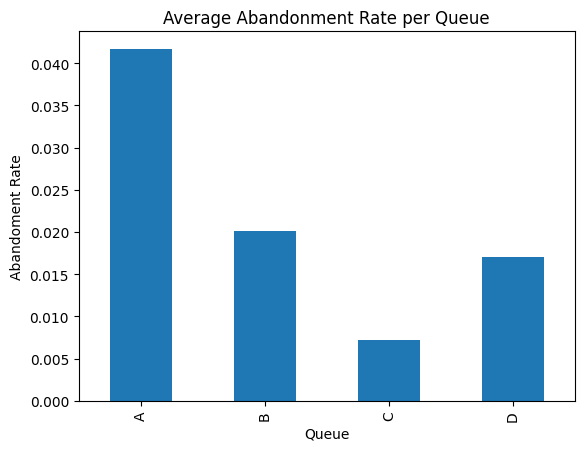

In [344]:
# Create visualization 1 here
# Import any additional libraries needed with alias

# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 

#Your code below:
abandoment_rates_plt = pd.Series(abandonment_rates)
abandoment_rates_plt.plot(kind = 'bar', title = 'Average Abandonment Rate per Queue', xlabel = 'Queue', ylabel = 'Abandoment Rate')
plt.show()

##### Record your answer below:

> Chart style you chose and why: I chose to use a bar chart because we are comparing categories of data. The bar chart effectively shows us how the average abandonment rate compares by queue.

#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?

/var/folders/x0/fdc1ntkx3cz66f_5cc2x1lf00000gn/T/ipykernel_30950/2848135171.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=service_level, x='Rep ID', y='Service Level %', estimator=sum, errorbar=None, palette='pastel')


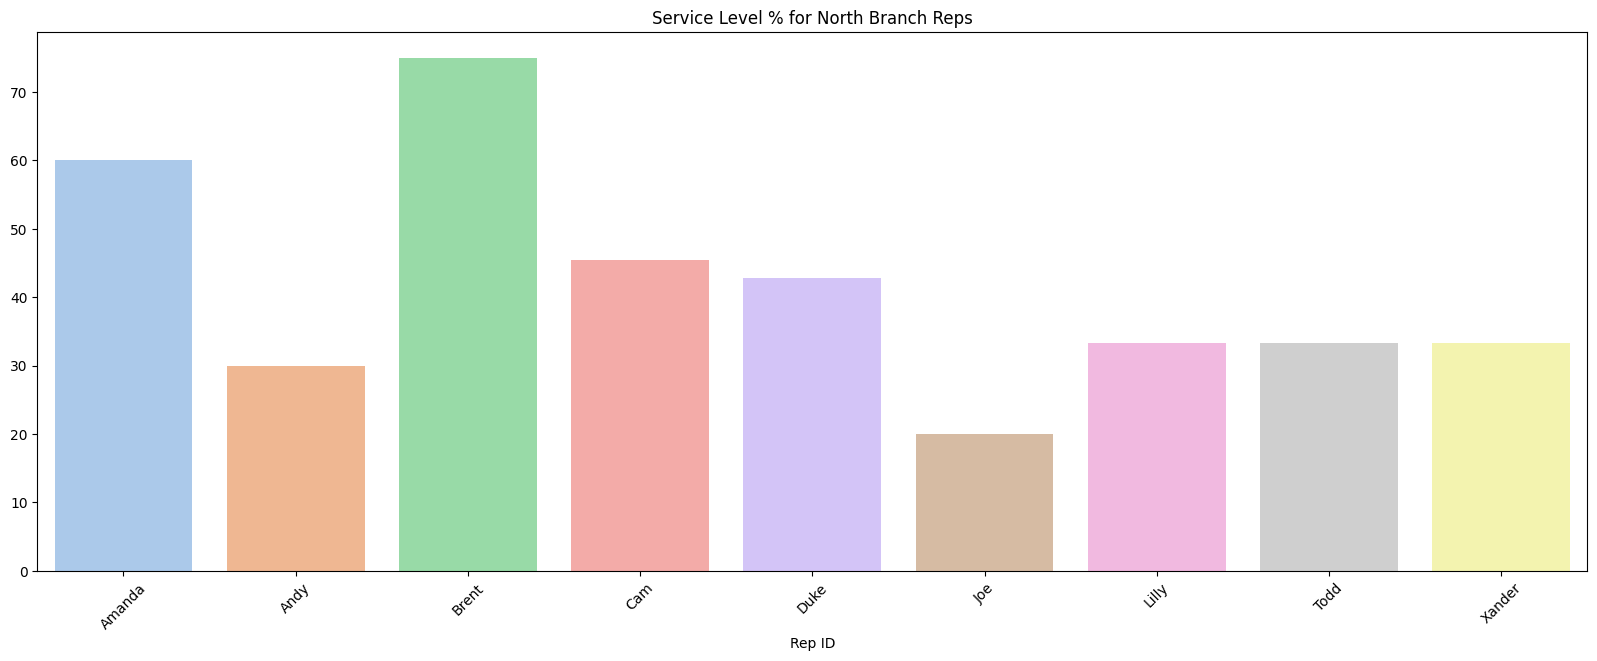

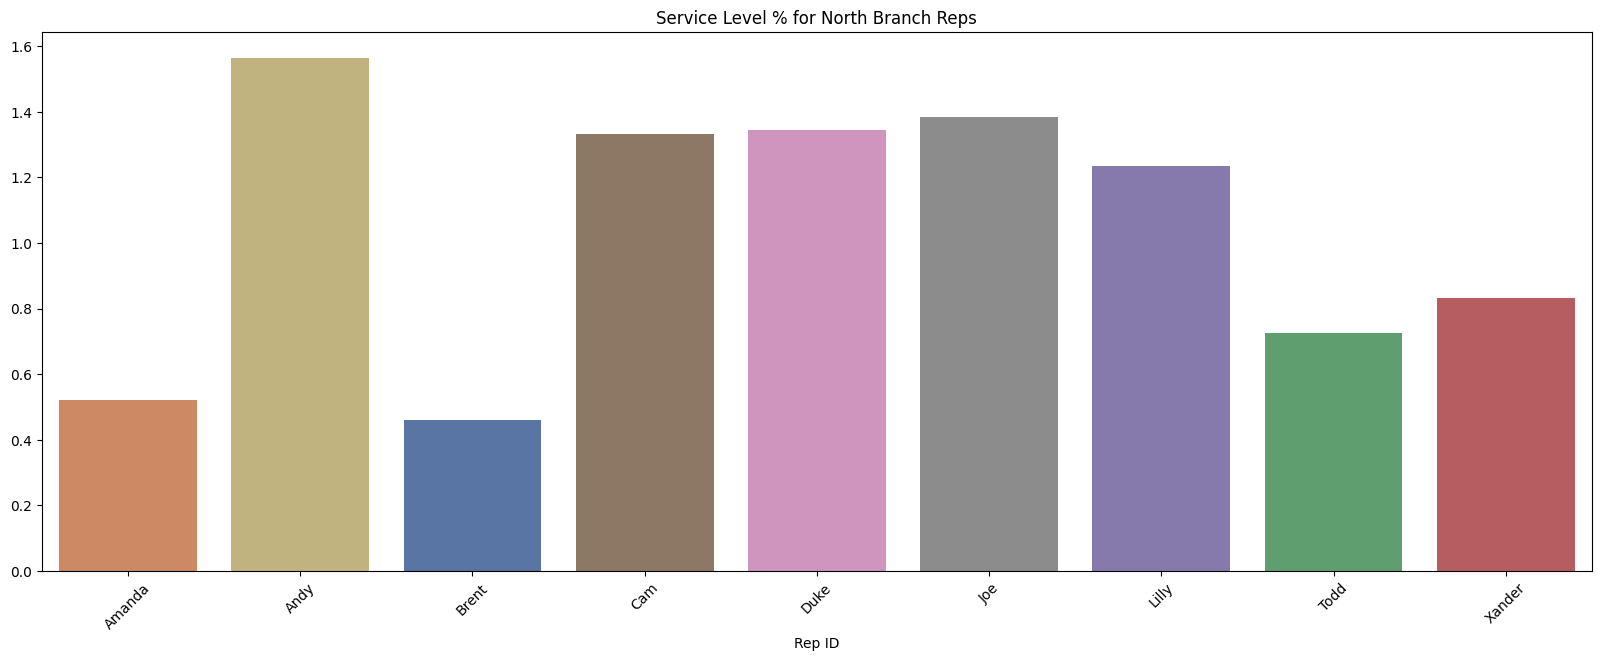

In [363]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()
# display(north_plt)

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
# quick_calls = north_df[(north_df["Incoming Wait Time"] >= 1.0) & (north_df["Incoming Wait Time"] <= 2.0)]
# quick_reps = quick_calls[["Rep ID", "Calls"]]
# quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table
# display(quick_stats)

# Table 2: Total Incoming Calls Only grouped by Rep
# total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
# rep_calls = total_calls_in[["Rep ID", "Calls"]]     
# total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  
# display(total_stats)
# quick_stats = quick_stats.reset_index()
# total_stats = total_stats.reset_index()

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100
# display(service_level)

#Your Code Here:
plt.figure(figsize=(20, 7))
sns.barplot(data=service_level, x='Rep ID', y='Service Level %', estimator=sum, errorbar=None, palette='pastel')
plt.title('Service Level % for North Branch Reps')
plt.xlabel('Rep ID')
plt.ylabel('')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(20, 7))
sns.barplot(data=north_plt, x='Rep ID', y='Incoming Wait Time', hue='x', estimator='mean', errorbar=None, palette='deep', dodge=False, legend=False)
plt.title('Service Level % for North Branch Reps')
plt.xlabel('Rep ID')
plt.ylabel('')
plt.xticks(rotation=45)
plt.show()


##### Record your answer below:

> Chart style you chose and why: 

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?

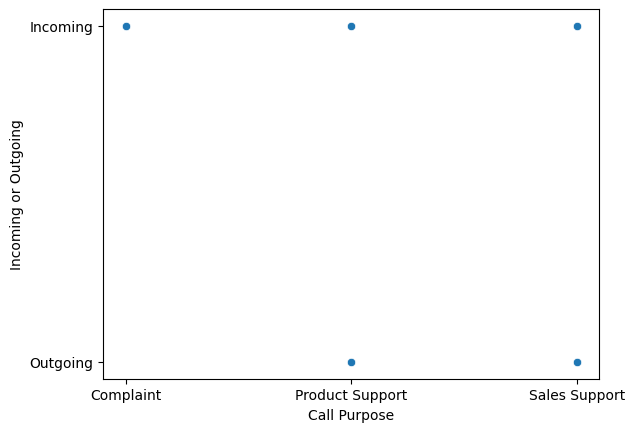

In [369]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

purpose_counts_df = pd.DataFrame(purpose_counts)

#Your Code Here:

# plt.figure(figsize=(12, 8))
sns.scatterplot(data=purpose_counts_df, x="Call Purpose", y="Incoming or Outgoing")

# Add title and labels
# plt.title('Relationship Between Pollinator Participants and Butterflies')
# plt.xlabel('Pollinator Participants')
# plt.ylabel('Number of Butterflies')

# Show the plot
plt.show()


##### Record your answer below:

> Chart style you chose and why: 

## Task 5: Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer below:
> Your Answer: 



#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer below:
> Your Answer: 


#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer below:
> Your Answer: 


## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer below:

> Chart style you chose and why: 

In [4]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot:

NameError: name 'df' is not defined